# Practice 4 

    22개 미국 전투기에 대한 6개 변수값이 jet.csv에 저장되어 있다. 각 변수는 아래와 같다.
     -    FFD: 처음 비행 날짜
     -    SPR: 단위무게 당 출력에 비례하는 특정한 출력
     -    RGF: 비행범위 요인
     -    PLF: 비행기의 총 무게의 일부분으로서의 탑재량
     -    SLF: 일관된 무게 요인
     -    CAR: 비행기가 항공모함에 착륙 가능여부

## 1.    계층적군집분석
 - A.    FFD와 CAR를 제외한 변수를 표준화 한 후 계층적 군집화를 시행하고 덴드로그램을 그리시오.
 - B.    A의 결과를 사용해 두 개의 집단으로 관측치를 분류하고 각 집단의 특징을 원변수 관점에서 비교하시오.
 - C.    두 집단을 주성분을 이용해 2차원 산점도로 표현하시오. (즉, 제1 주성분과 제2 주성분을 사용한 산점도에서 두 개의 집단을 서로 다른 마크와 색으로 표현하시오.)
 
## 2.    비계층적군집분석
 - A.    군집 개수 1~5까지를 사용해 k-means clustering을 시행하고 얻은 within-group sum of squares를 저장하고 그래프로 표현하여 적절한 군집 개수를 판단하시오.
 - B.    K-means clustering을 이용해 2개의 집단으로 군집화하고 그 결과를 1번의 B, C와 같이 탐색하시오.
 
## 3.    모형기반 군집화를 통해 최적의 군집 개수를 찾고 그 결과를 1번의 B, C와 같이 탐색하시오.

## Import library

In [236]:
library(reshape2)
library(dplyr)
library(psych)
library(ggplot2)
library(gridExtra)

library(RColorBrewer)
library(ggfortify)

## Data Handling

In [237]:
jet = read.csv("jet.csv")
head(jet)

,X,FFD,SPR,RGF,PLF,SLF,CAR
1,FH-1,82,1.468,3.3,0.166,0.1,no
2,FJ-1,89,1.605,3.64,0.154,0.1,no
3,F-86A,101,2.168,4.87,0.177,2.9,yes
4,F9F-2,107,2.054,4.72,0.275,1.1,no
5,F-94A,115,2.467,4.11,0.298,1,yes
6,F3D-1,122,1.294,3.75,0.15,0.9,no


In [238]:
str(jet)

'data.frame':	22 obs. of  7 variables:
 $ X  : Factor w/ 22 levels "F-100A","F-101A",..: 19 20 9 17 12 14 10 21 18 1 ...
 $ FFD: int  82 89 101 107 115 122 127 137 147 166 ...
 $ SPR: num  1.47 1.6 2.17 2.05 2.47 ...
 $ RGF: num  3.3 3.64 4.87 4.72 4.11 3.75 3.97 4.65 3.84 4.92 ...
 $ PLF: num  0.166 0.154 0.177 0.275 0.298 0.15 0 0.117 0.155 0.138 ...
 $ SLF: num  0.1 0.1 2.9 1.1 1 0.9 2.4 1.8 2.3 3.2 ...
 $ CAR: Factor w/ 2 levels "no","yes": 1 1 2 1 2 1 2 1 1 2 ...


 - 필요한 데이터의 통계치 확인.
 - 다양한 범위의 데이터가 존재한다. 
  - 즉, Normalization 정규화가 필요하다. 

In [239]:
summary(jet[,-c(1,2,7)])

      SPR             RGF             PLF              SLF       
 Min.   :0.455   Min.   :3.300   Min.   :0.0000   Min.   :0.100  
 1st Qu.:2.172   1st Qu.:4.005   1st Qu.:0.1222   1st Qu.:1.850  
 Median :3.258   Median :4.515   Median :0.1605   Median :2.670  
 Mean   :3.944   Mean   :4.577   Mean   :0.1683   Mean   :2.265  
 3rd Qu.:6.024   3rd Qu.:4.973   3rd Qu.:0.2132   3rd Qu.:2.900  
 Max.   :8.548   Max.   :6.450   Max.   :0.3660   Max.   :3.500  

In [240]:
jet_tmp <- jet[,-c(1,2,7)]
jet_s <- scale(jet_tmp)
rownames(jet_s) <- jet[,1]
jet_s <- as.data.frame(jet_s)
head(jet_s)

,SPR,RGF,PLF,SLF
FH-1,-1.04614198,-1.69627044,-0.02622718,-2.15830567
FJ-1,-0.9882683,-1.2447365,-0.1647067,-2.1583057
F-86A,-0.7504372,0.3887538,0.1007124,0.6324506
F9F-2,-0.7985949,0.1895477,1.2316285,-1.1616070
F-94A,-0.6241291,-0.6205573,1.4970476,-1.2612769
F3D-1,-1.1196457,-1.0986520,-0.2108665,-1.3609467


In [241]:
summary(jet_s)

      SPR               RGF               PLF               SLF         
 Min.   :-1.4741   Min.   :-1.6963   Min.   :-1.9419   Min.   :-2.1583  
 1st Qu.:-0.7489   1st Qu.:-0.7600   1st Qu.:-0.5311   1st Qu.:-0.4141  
 Median :-0.2900   Median :-0.0827   Median :-0.0897   Median : 0.4032  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.8787   3rd Qu.: 0.5249   3rd Qu.: 0.5190   3rd Qu.: 0.6325  
 Max.   : 1.9447   Max.   : 2.4871   Max.   : 2.2818   Max.   : 1.2305  

### 데이터 분포 및 형태 확인.
확인 결과 
- 전투기의 출력과 비행거리, 총 무게, 적재량은 양의 강한 관계를 가지고 있다. 
- 비행거리와 적재량은 관계가 적으며 비행거리와 총 무게량은 관계가 크다. 
 - 출력이 높아 장거리 비행이 가능한 비행기의 엔진의 무게가 높아 총 비행기 무게가 높을 것으로 판단 된다.
- 적재량과 총 무게량은 큰 관계가 없다. 즉, 비행기 전체의 무게는 적재량 외에 다른 부분이 많이 영향도가 높다 라는 의미.

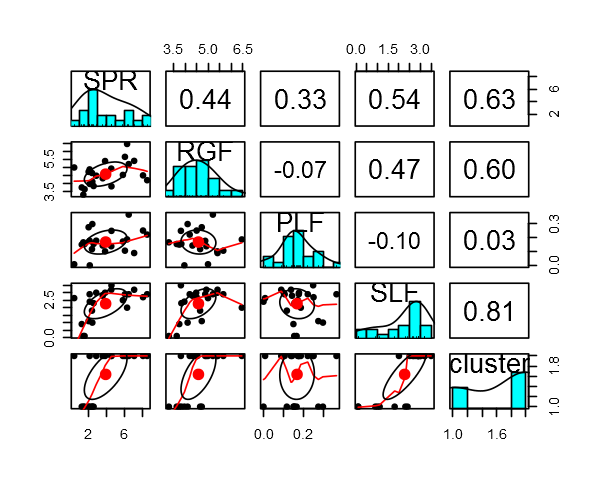

In [303]:
options(repr.plot.width=5,repr.plot.height=4)
pairs.panels(jet_s, cex=0.5)

## 1.    계층적군집분석 
### A. FFD와 CAR를 제외한 변수를 표준화 한 후 계층적 군집화를 시행하고 덴드로그램을 그리시오.
 - 계층적 군집분석 결과를 통해 나누는 군집의 수에 따라 최적의 군집을 선택할 수 있다.
  - Complete (2개 군집) 또는 ward.D(4개 군집)을 통한 군집 분석이 군형잡히게 분류 되었음.

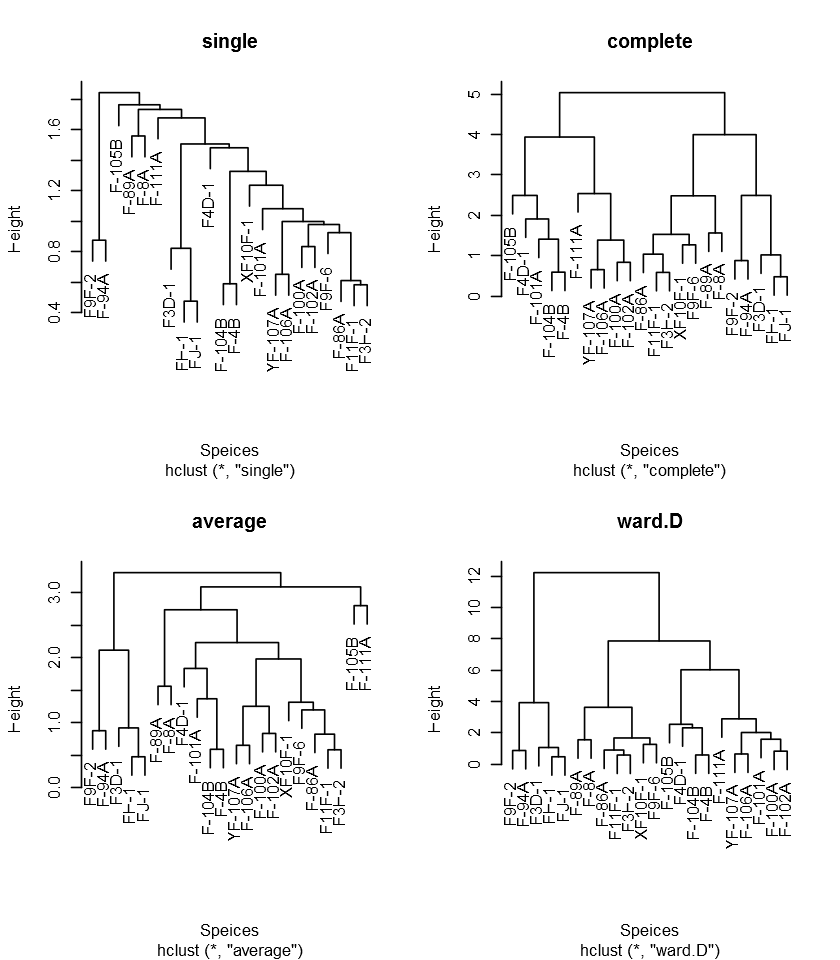

In [243]:
options(repr.plot.width=7,repr.plot.height=8)
par(mfrow=c(2,2))
hc1 <- hclust(dist(jet_s),method="single")
plot(hc1, main="single", xlab="Speices")
hc2 <- hclust(dist(jet_s),method="complete")
plot(hc2, main="complete", xlab="Speices")
hc3 <- hclust(dist(jet_s),method="average")
plot(hc3, main="average", xlab="Speices")
hc4 <- hclust(dist(jet_s),method="ward.D")
plot(hc4, main="ward.D", xlab="Speices")
par(mfrow=c(1,1))

### B. A의 결과를 사용해 두 개의 집단으로 관측치를 분류하고 각 집단의 특징을 원변수 관점에서 비교하시오.
 - 결과를 두 개의 집단으로 분류하게 된다면 **Complete** 기법을 사용한 **Cluster** 가 좋다고 판단 된다. 
  - 좌우 대칭형이다.

In [244]:
hc2_result <- cutree(hc2,k=2)
jet_s$cluster <- hc2_result
t(hc2_result)

FH-1,FJ-1,F-86A,F9F-2,F-94A,F3D-1,F-89A,XF10F-1,F9F-6,F-100A,...,F-101A,F3H-2,F-102A,F-8A,F-104B,F-105B,YF-107A,F-106A,F-4B,F-111A
1,1,1,1,1,1,1,1,1,2,...,2,1,2,1,2,2,2,2,2,2


- $Describeby$함수를 활용하여 $Group$별 통계치 생성

In [245]:
tab <- describeBy(jet_s,group=jet_s$cluster,mat=T,digits=4)
tab

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
SPR1,1,1,1,12,-0.7776,0.3477,-0.7473,-0.772,0.3138,-1.4741,-0.1379,1.3362,-0.1804,-0.4962,0.1004
SPR2,2,2,1,10,0.9332,0.6416,0.9532,0.9268,0.7882,-0.0272,1.9447,1.9719,0.0648,-1.3693,0.2029
RGF1,3,1,2,12,-0.4745,0.7107,-0.4811,-0.4546,0.886,-1.6963,0.5481,2.2444,-0.1061,-1.4411,0.2052
RGF2,4,2,2,10,0.5694,1.0274,0.6411,0.5265,1.0731,-1.0057,2.4871,3.4927,0.2102,-1.0222,0.3249
PLF1,5,1,3,12,-0.1907,1.003,-0.1589,-0.1843,0.3935,-1.9419,1.497,3.4389,-0.1866,-0.594,0.2896
PLF2,6,2,3,10,0.2288,0.9985,0.1296,0.1151,1.2062,-0.9148,2.2818,3.1966,0.5907,-0.7911,0.3158
SLF1,7,1,4,12,-0.5104,1.0692,-0.2147,-0.4699,1.3299,-2.1583,0.7321,2.8904,-0.3134,-1.6029,0.3087
SLF2,8,2,4,10,0.6125,0.4144,0.6325,0.6449,0.3694,-0.2646,1.2305,1.495,-0.6073,-0.3552,0.1311
cluster1,9,1,5,12,1,0,1,1,0,1,1,0,NaN,NaN,0
cluster2,10,2,5,10,2,0,2,2,0,2,2,0,NaN,NaN,0


 - $boxplot$을 활용 각 독립변수, $Group$별 데이터 비교.
 - $DescribeBy$와 $ggplot2$를 활용하여 데이터 비교.

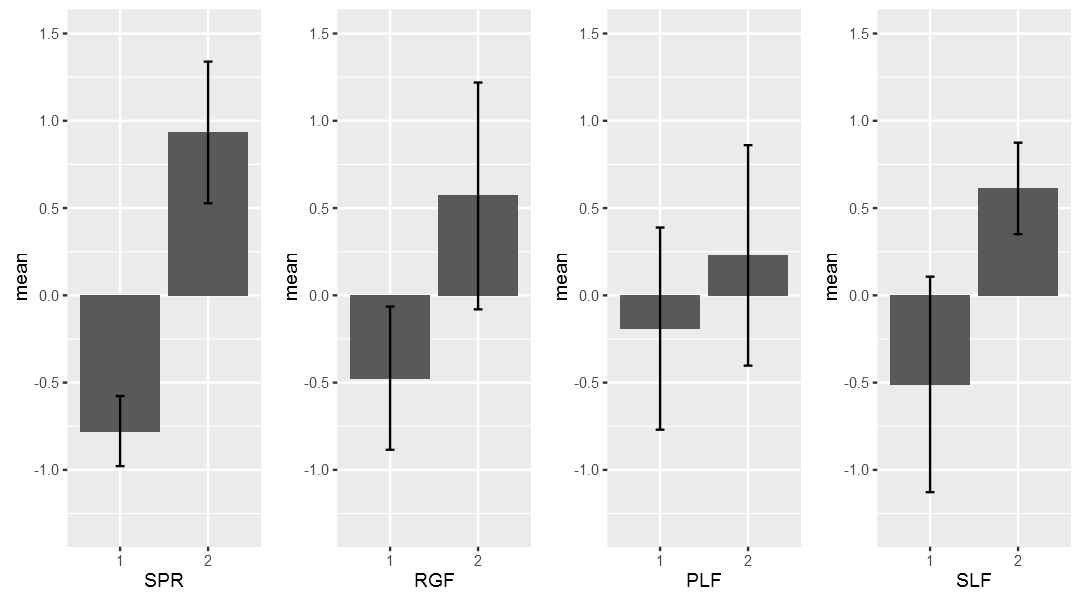

In [246]:
options(repr.plot.width=9,repr.plot.height=5)
gg1 <- ggplot(tab[c(1,2),],aes(x=group1,y=mean)) + geom_bar(position = position_dodge(), stat="identity") 
gg1 <- gg1 + geom_errorbar(aes(ymin=mean-2*se, ymax=mean+2*se, width=0.1)) + xlab("SPR") + ylim(c(-1.3,1.5))
gg2 <- ggplot(tab[c(3,4),],aes(x=group1,y=mean)) + geom_bar(position = position_dodge(), stat="identity") 
gg2 <- gg2 + geom_errorbar(aes(ymin=mean-2*se, ymax=mean+2*se, width=0.1)) + xlab("RGF") + ylim(c(-1.3,1.5))
gg3 <- ggplot(tab[c(5,6),],aes(x=group1,y=mean)) + geom_bar(position = position_dodge(), stat="identity") 
gg3 <- gg3 + geom_errorbar(aes(ymin=mean-2*se, ymax=mean+2*se, width=0.1)) + xlab("PLF") + ylim(c(-1.3,1.5))
gg4 <- ggplot(tab[c(7,8),],aes(x=group1,y=mean)) + geom_bar(position = position_dodge(), stat="identity") 
gg4 <- gg4 + geom_errorbar(aes(ymin=mean-2*se, ymax=mean+2*se, width=0.1)) + xlab("SLF") + ylim(c(-1.3,1.5))

grid.arrange(gg1, gg2,gg3,gg4,ncol=4)

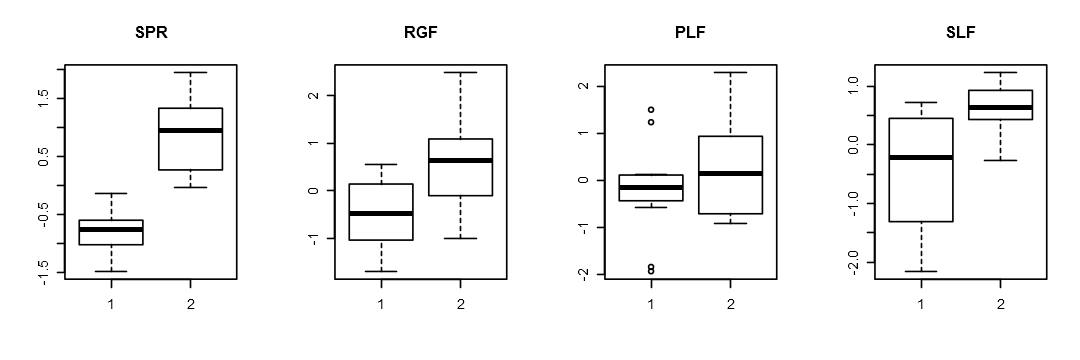

In [247]:
options(repr.plot.width=9,repr.plot.height=3)
par(mfrow=c(1,4))
for (i in 1:4){
     boxplot(jet_s[,i]~jet_s[,5],main=names(jet_s)[i])
}

 - $boxplot$을 통해 각 변수, $Group$별 데이터 비교.
 - $ggplot2$를 활용하여 각 통계치의 평균을 $barplot$과 $Standard \ Error$를 활용하여 비교.
 - 모든 독립변수의 평균에 대해 $Group1 < Group2$ 이다.
 - $SPR$과 $RGF$가 통계적으로 유의하게 $Group2$가 높은 값을 가지고 있다.
 - $PLF$의 경우 큰 차이도 없을 뿐더러, $SE$ 범위내에 값들이 포함되고 있어 두 그룹간의 차이가 없다.
  - 전투기의 경우 적재부분이 많이 필요하지 않으므로 대부분 비슷하게 구성.
  - 원변수의 값을 경우에도 0 ~ 0.3660 범위에 값들이 포함. 
 - $SLF$의 경우 대부분 $Group1 < Group2$ 이지만 $Group1$의 몇몇의 전투기는 $Group2$와 비슷하거나 큰 무게를 지니고 있다.

 - $Group$별 각 변수에 대한 $Boxplot$ 
  - 위의 결과를 바탕으로 한 통계치 비교를 그룹별로 표현

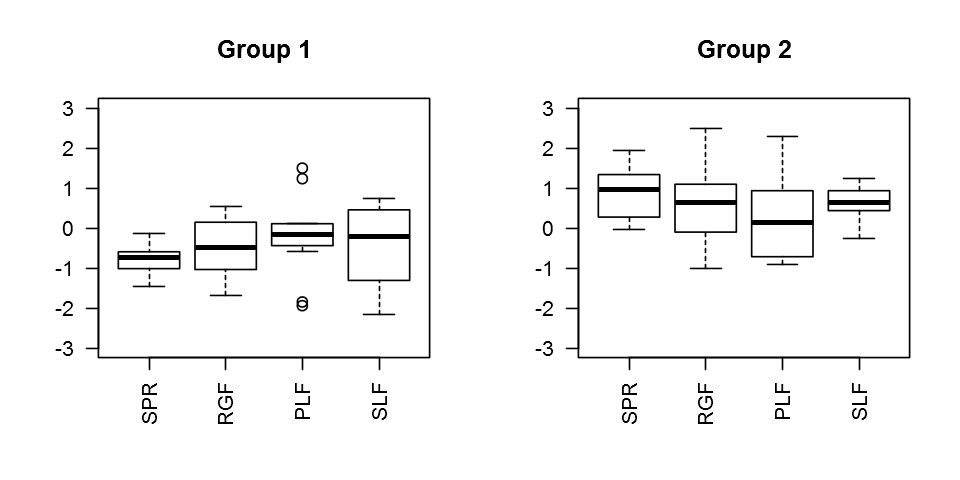

In [248]:
options(repr.plot.width=8,repr.plot.height=4)
par(mfrow=c(1,2))
for (i in 1:2){
  boxplot(jet_s[jet_s$cluster==i,-5],las=2,main=paste("Group",i), ylim=c(-3,3))
}

 - $Pairs$ 그래프를 통해 각 $Cluster$의 분포를 확인. 
 - 각각의 원변수에 대해서 대부분 $Group2$가 높은 값을 가지고 있으나 $PLF, SLF$의 값의 경우 혼재되어 있는 모양으로 출력된다.

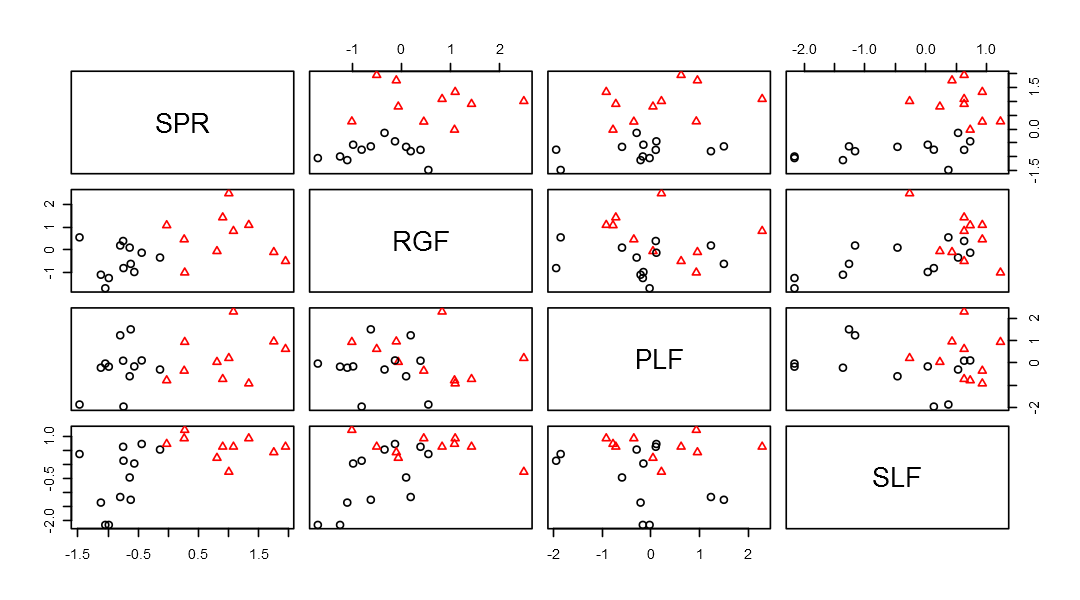

In [249]:
options(repr.plot.width=9,repr.plot.height=5)
pairs(jet_s[,-5],col=jet_s$cluster,pch=jet_s$cluster)

### C. 두 집단을 주성분을 이용해 2차원 산점도를 표현. <br>    즉, 제1 주성분과 제 2 주성분을 사용한 산점도에서 두 개의 집단을 서로 다른 마크와 색으로 표현하시오.

 - $Cluster$ 변수를 제외한 나머지 원변수를 이용하여 $PCA$ 생성.

In [250]:
jet_pca <- prcomp(jet_s[,-5])
jet_pca

Standard deviations:
[1] 1.4064330 1.0778969 0.7421941 0.5560867

Rotation:
          PC1        PC2        PC3        PC4
SPR 0.6011860 -0.3052264  0.1840062 -0.7152300
RGF 0.5408329  0.2456147 -0.7910625  0.1462644
PLF 0.1064118 -0.8853327 -0.1215182  0.4359998
SLF 0.5785773  0.2503921  0.5706094  0.5262670

 1. $PC1,PC2$ 두개의 설명변수로도 $78\%$를 설명가능하므로 채택해도 무방하다고 판단.
 2. $Plot$ 그려본다.

In [251]:
summary(pca)

Importance of components:
                          PC1    PC2    PC3     PC4
Standard deviation     1.4064 1.0779 0.7422 0.55609
Proportion of Variance 0.4945 0.2905 0.1377 0.07731
Cumulative Proportion  0.4945 0.7850 0.9227 1.00000

 - $Plot$의 경우 $PC3$에서 팔꿈치를 형성하나 $PC2$까지로도 설명도가 높아. 교수님이 주신 2개의 변수 이외에도 $PC2$까지 선택가능 하다고 판단.

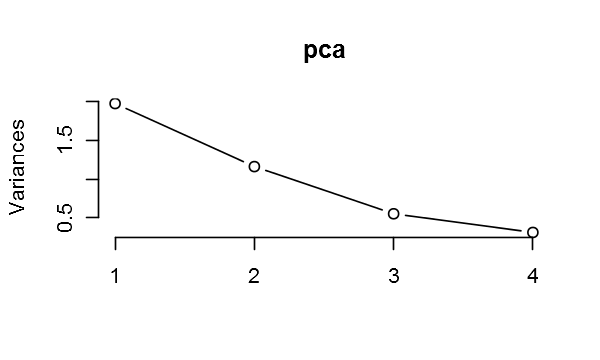

In [252]:
options(repr.plot.width=5,repr.plot.height=3)
plot(pca,type="l")

 - $PCA$ 값 중 제 1 주성분, 제 2 주성분의 값과 $Cluster$ 값만 가지고 있는 $DataFrame$ 생성.

In [253]:
df_pca <- data.frame(PC1 = jet_pca$x[,1], PC2= jet_pca$x[,2], cluster=as.factor(jet_s$cluster))
head(df_pca)

,PC1,PC2,cluster
FH-1,-2.7978623489877,-0.614521600283266,1
FJ-1,-2.53360097312598,-0.398682353891385,1
F-86A,0.135737051536855,0.393733577057406,1
F9F-2,-0.918610106741211,-1.09095027232654,1
F-94A,-1.28127814355926,-1.60311627130204,1
F3D-1,-2.07715408580006,-0.0821828168198567,1


 - 정규성검정.
  - 정규분포를 따른다고 생각된다. 즉, 각 항목들이 정규분포를 따른다고 판단.

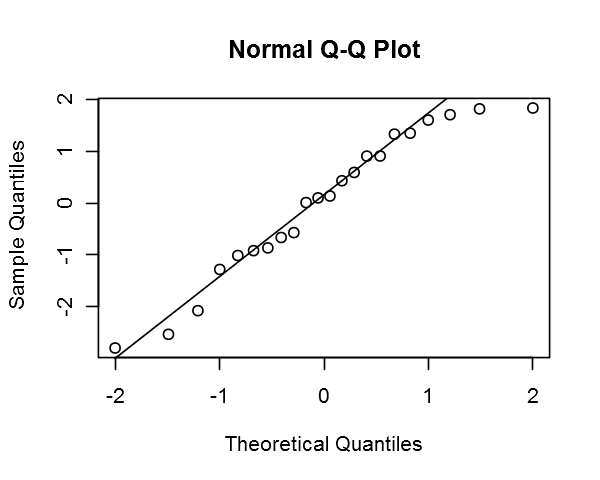

In [300]:
options(repr.plot.width=5,repr.plot.height=4)
qqnorm(pca$x[,1])
qqline(pca$x[,1])

 - $Biplot$을 통해 $PCA$의 영향도와 분포를 확인. 
  - $Biplot$과 동일 한 형태의 $autoplot$을 활용

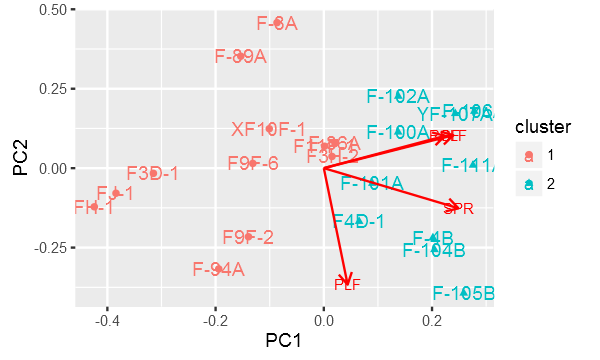

In [254]:
autoplot(pca,data=df_pca,colour='cluster',label=T,shape='cluster', loadings=T,loadings.label = T,loadings.label.size = 3)

 - $PLF$를 제외한 나머지 변수들은 $PC1$과 높은 관련을 가지고 있다. 
 - $PC2$는 $PLF$와 높은 관련이 있고 나머지와는 큰 연관성이 없다.
  - $PC1$과 $PC2$는 수직 차원이므로 반대의 성향을 가지고 있다.
  - $PC1$의 수치를 기준으로 Group이 나누어 지게 되며 $PC1$은 힘이 좋고 장거리 비행이 가능한 전투기로 보인다. 
  - $PC2$에 있어서는 뚜렷하게 구분되는 수치는 보여지지 않는다. 
  
### PC1을 통해 성능이 좋고 장거리 비행이 가능한 전투기와 그렇지 못한 전투기로 구분이 된다. 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a3/F-111F_dropping_high-drag_bombs.jpg/300px-F-111F_dropping_high-drag_bombs.jpg", width=300 align="left" alt="F-111A"> 
<img src="https://i.ytimg.com/vi/kwGWIAkQaZ4/maxresdefault.jpg", width=300 align="center" alt="FJ-1"> 

 - $Group2$의 $F-111A$은 1990년대 단종되었다.
 - $Group1$의 $FJ-1$은 1950년대 단종이 되었다. 
 - 연식에 따라 성능의 향상은 당연한 결과라고 생각된다.

#### 1. 일반 $Plot$을 활용하여 그래프 그리기.

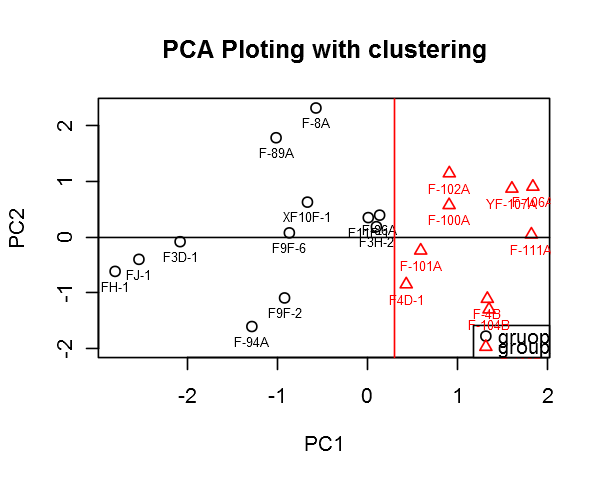

In [255]:
options(repr.plot.width=5,repr.plot.height=4)
plot(df_pca[,-3], col=as.numeric(df_pca$cluster), pch=as.numeric(df_pca$cluster),main="PCA Ploting with clustering")
legend("bottomright",c("gruop1","group2"), pch=c(1,2), col=c(1,2))
text(df_pca$PC1,df_pca$PC2,row.names(df_pca),cex=0.6,col=as.numeric(df_pca$cluster),pos=1)
abline(h=0,col="black")
abline(v=0.3,col="red")

#### 2. ggplot2를 활용하여 그리기.

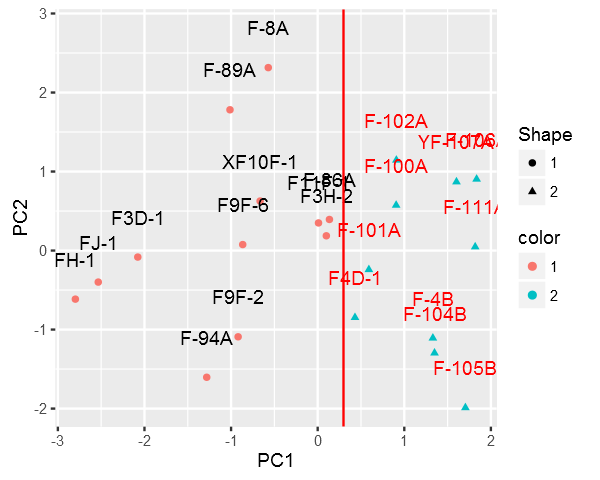

In [256]:
gg <- ggplot(df_pca, aes(x=PC1,y=PC2,label = rownames(df_pca))) + geom_point(aes(colour=df_pca$cluster,shape=df_pca$cluster)) + labs(shape="Shape", color="color")
gg + geom_text(nudge_y = 0.5, colour=df_pca$cluster) + geom_vline(xintercept = .3, color='red')

## 2. 비계층적군집분석
### 2 - A. 군집 개수 1~5까지를 사용해 k-means clustering을 시행하고 얻은 within-group sum of squares를 저장하고 그래프로 표현하여 적절한 군집 개수를 판단하시오.
 - 위에 사용했던 jet_s(Scale) 데이터에서 Cluster만 제외하고 재사용.

In [257]:
jet_s <- jet_s[,-5] # cluster 제외.
head(jet_s,2)

,SPR,RGF,PLF,SLF
FH-1,-1.04614198,-1.69627044,-0.02622718,-2.15830567
FJ-1,-0.9882683,-1.2447365,-0.1647067,-2.1583057


 - 1~5 군집 수를 활용
 - $km\$withinss$ : 각 클러스터의 중심에서 각 클러스터의 해당 값의 거리 제곱의 합
  - $withinss < betweenss$ 가 되어야한다.
  - 군집 내 거리보다 군집간의 거리가 커져야한다.

In [258]:
withinss <- c()
betweenss <- c()
for(i in 1:5){
  km <- kmeans(jet_s,i)
  withinss[i] <- sum(km$withinss)
  betweenss[i] <- km$betweenss
}

- $withinss < betweenss$ 가 되는 지점은 $Cluster$가 3개 이상일 때 부터 이다.

In [259]:
df <- data.frame(withinss = withinss, betweenss = betweenss)
df$comp <- df$withinss < df$betweenss
df

,withinss,betweenss,comp
1,8.400000e+01,-1.421085e-14,0.000000e+00
2,63.15345,20.84655,0.00000
3,37.74451,46.25549,1.00000
4,26.87918,57.12082,1.00000
5,21.95492,62.04508,1.00000


 - $Plot$을 통해 3개 또는 4개의 $Cluster$로 나누는 것이 좋다고 판단.
 - 실질 적으로 $Cluster$는 3개 또는 4개 사용자에 따라 선택하면 될 것이다.
 - 3개가 가장 적합하다고 판단. 팔쿰치 형상은 물론, Withinss < betweenss 모든 조건에 부합한다.

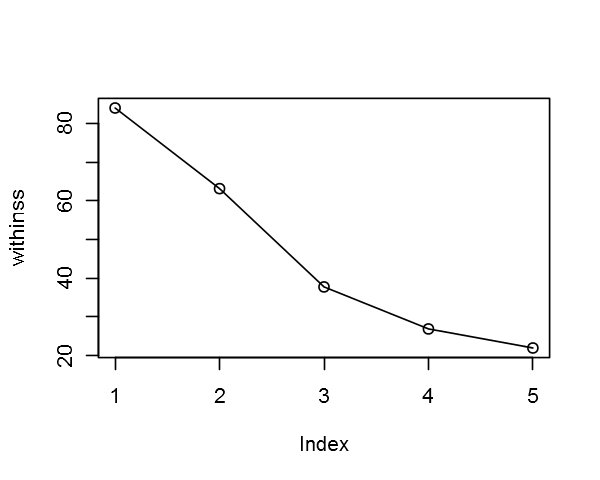

In [260]:
plot(withinss,type = "l") # 2개아니면 4개로 표현.
points(withinss)

### 2 - B. K-means clustering을 이용해 2개의 집단으로 군집화하고 그 결과를 1번의 B, C와 같이 탐색하시오.

In [261]:
km <- kmeans(jet_s,2) # 2개의 군집 형성.
jet_s$cluster <- km$cluster 

- $Describeby$함수를 활용하여 $Group$별 통계치 생성
- $boxplot$을 활용 각 독립변수, $Group$별 데이터 비교.
- $DescribeBy$와 $ggplot2$를 활용하여 데이터 비교.

In [262]:
tab <- describeBy(jet_s,group=jet_s$cluster,mat=T,digits=4)
tab

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
SPR1,1,1,1,10,0.9332,0.6416,0.9532,0.9268,0.7882,-0.0272,1.9447,1.9719,0.0648,-1.3693,0.2029
SPR2,2,2,1,12,-0.7776,0.3477,-0.7473,-0.772,0.3138,-1.4741,-0.1379,1.3362,-0.1804,-0.4962,0.1004
RGF1,3,1,2,10,0.5694,1.0274,0.6411,0.5265,1.0731,-1.0057,2.4871,3.4927,0.2102,-1.0222,0.3249
RGF2,4,2,2,12,-0.4745,0.7107,-0.4811,-0.4546,0.886,-1.6963,0.5481,2.2444,-0.1061,-1.4411,0.2052
PLF1,5,1,3,10,0.2288,0.9985,0.1296,0.1151,1.2062,-0.9148,2.2818,3.1966,0.5907,-0.7911,0.3158
PLF2,6,2,3,12,-0.1907,1.003,-0.1589,-0.1843,0.3935,-1.9419,1.497,3.4389,-0.1866,-0.594,0.2896
SLF1,7,1,4,10,0.6125,0.4144,0.6325,0.6449,0.3694,-0.2646,1.2305,1.495,-0.6073,-0.3552,0.1311
SLF2,8,2,4,12,-0.5104,1.0692,-0.2147,-0.4699,1.3299,-2.1583,0.7321,2.8904,-0.3134,-1.6029,0.3087
cluster1,9,1,5,10,1,0,1,1,0,1,1,0,NaN,NaN,0
cluster2,10,2,5,12,2,0,2,2,0,2,2,0,NaN,NaN,0


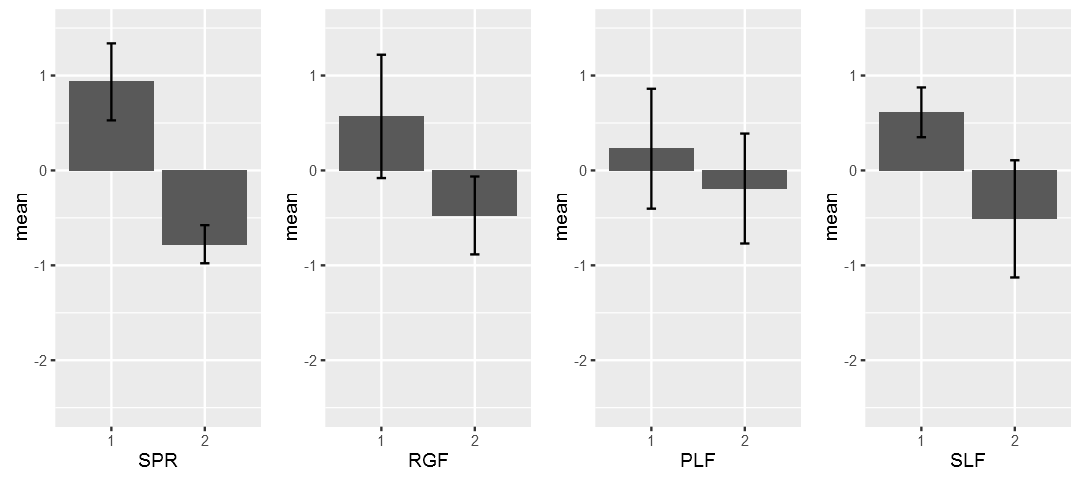

In [263]:
options(repr.plot.width=9,repr.plot.height=4)
gg1 <- ggplot(tab[c(1,2),],aes(x=group1,y=mean)) + geom_bar(position = position_dodge(), stat="identity") 
gg1 <- gg1 + geom_errorbar(aes(ymin=mean-2*se, ymax=mean+2*se, width=0.1)) + xlab("SPR") + ylim(c(-2.5,1.5))
gg2 <- ggplot(tab[c(3,4),],aes(x=group1,y=mean)) + geom_bar(position = position_dodge(), stat="identity") 
gg2 <- gg2 + geom_errorbar(aes(ymin=mean-2*se, ymax=mean+2*se, width=0.1)) + xlab("RGF") + ylim(c(-2.5,1.5))
gg3 <- ggplot(tab[c(5,6),],aes(x=group1,y=mean)) + geom_bar(position = position_dodge(), stat="identity") 
gg3 <- gg3 + geom_errorbar(aes(ymin=mean-2*se, ymax=mean+2*se, width=0.1)) + xlab("PLF") + ylim(c(-2.5,1.5))
gg4 <- ggplot(tab[c(7,8),],aes(x=group1,y=mean)) + geom_bar(position = position_dodge(), stat="identity") 
gg4 <- gg4 + geom_errorbar(aes(ymin=mean-2*se, ymax=mean+2*se, width=0.1)) + xlab("SLF") + ylim(c(-2.5,1.5))

grid.arrange(gg1, gg2,gg3,gg4,ncol=4)

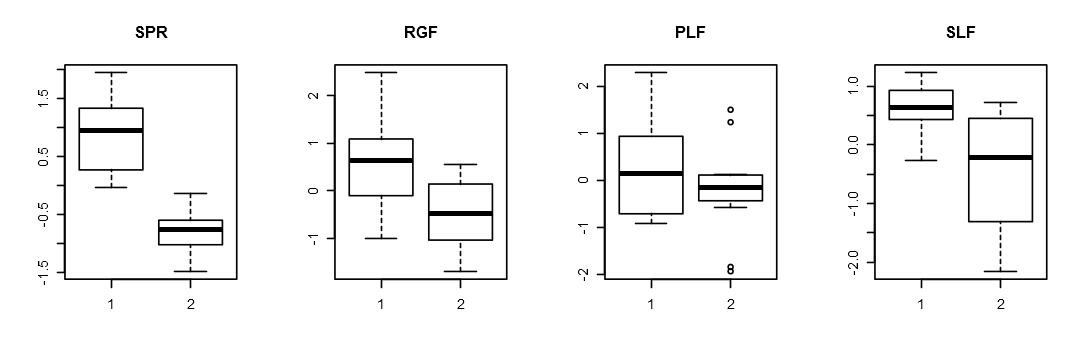

In [264]:
options(repr.plot.width=9,repr.plot.height=3)
par(mfrow=c(1,4))
for (i in 1:4){
     boxplot(jet_s[,i]~jet_s[,5],main=names(jet_s)[i])
}

 - $boxplot$을 통해 각 변수, $Group$별 데이터 비교.
 - $ggplot2$를 활용하여 각 통계치의 평균을 $barplot$과 $Standard \ Error$를 활용하여 비교.
 - 모든 데이터에 있어서 평균적으로 $Group1 > Group2$의 형상을 나타낸다.
 - 하지만 $PLF$의 경우 평균적으로 비슷한 값을 가지고 있어 두 그룹을 구분하는데 큰 영향이 있을 것 으로 생각된다. 
 - 두 그룹을 크게 나누는 것은 $SPR$과 $SLF$로 보여진다.

- $Group$별 각 변수에 대한 $Boxplot$

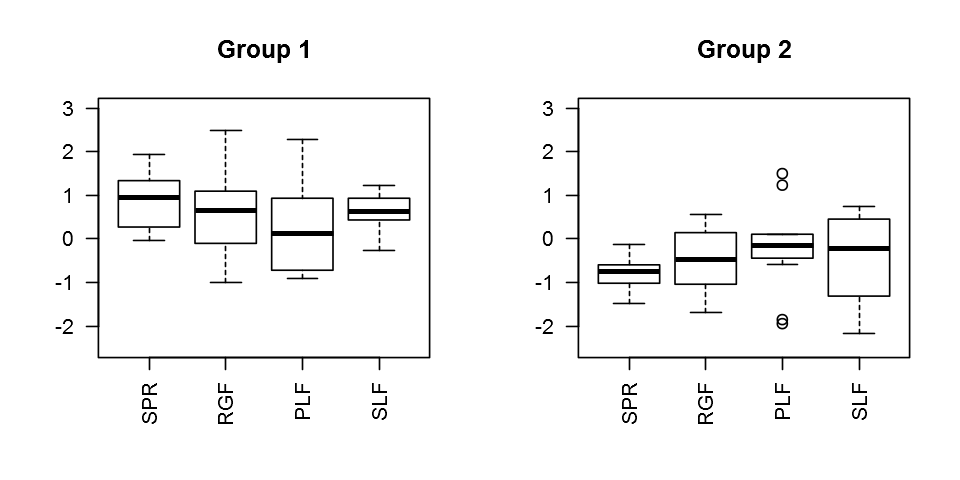

In [265]:
options(repr.plot.width=8,repr.plot.height=4)
par(mfrow=c(1,2))
for (i in 1:2){
  boxplot(jet_s[jet_s$cluster==i,-5],las=2,main=paste("Group",i), ylim=c(-2.5,3))
}

 - $Pairs$를 통한 분포 확인.
  - 힘이 좋고 장거리 비행이 많으며, 무게가 평균 이상인 전투기는 대부분 $Group2$에 속한다.
  - $Group1$의 전투기는 무게가 가벼우며, 힘이 적고 단거리다. 
  - 위의 원변수의 $Boxplot$에서 확인했다시피 $RGF$와 $PLF$의 분포는 혼재되어 나타난다. 반면 $SPR$과 $SLF$는 쉽게 군집을 확인할 수 있다.

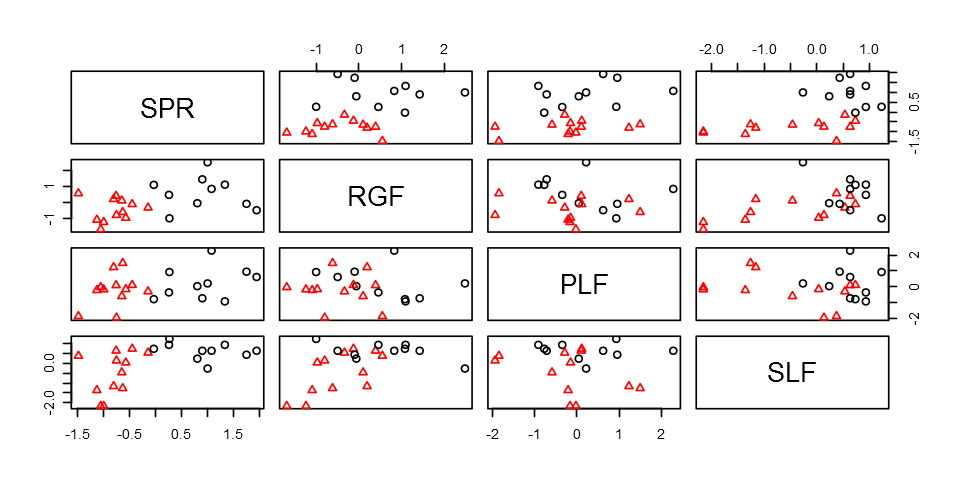

In [267]:
pairs(jet_s[,-5],col=km$cluster,pch=km$cluster)

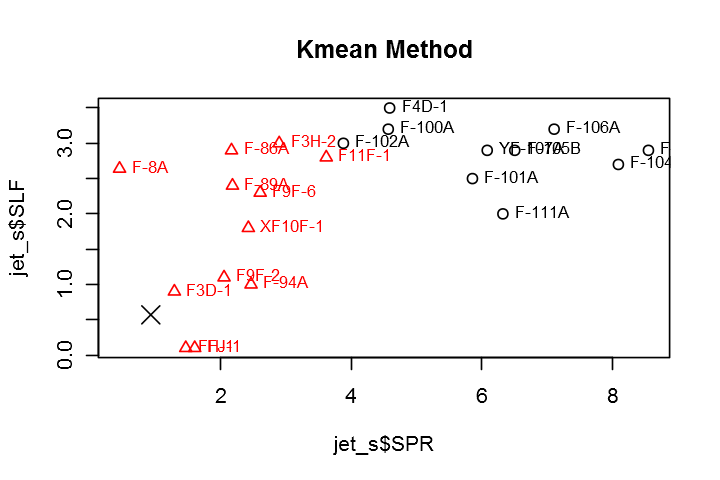

In [294]:
plot(jet_s$SPR,jet_s$SLF,pch=km$cluster,col=km$cluster,main="Kmean Method")
text(jet_s$SPR,jet_s$SLF,labels=rownames(jet_s),cex=0.8,adj=0,pos=4,col=km$cluster)
points(km$centers[,c(1,2)],col=1:2,pch=4,cex=2)

### 2 - C. 두 집단을 주성분을 이용해 2차원 산점도를 표현. <br>    즉, 제1 주성분과 제 2 주성분을 사용한 산점도에서 두 개의 집단을 서로 다른 마크와 색으로 표현하시오.

In [269]:
kmean_pca <- prcomp(jet_s[,-5])
kmean_pca

Standard deviations:
[1] 1.4064330 1.0778969 0.7421941 0.5560867

Rotation:
          PC1        PC2        PC3        PC4
SPR 0.6011860 -0.3052264  0.1840062 -0.7152300
RGF 0.5408329  0.2456147 -0.7910625  0.1462644
PLF 0.1064118 -0.8853327 -0.1215182  0.4359998
SLF 0.5785773  0.2503921  0.5706094  0.5262670

In [270]:
summary(kmean_pca) # PCA의 경우 1번과 동일하다.

Importance of components:
                          PC1    PC2    PC3     PC4
Standard deviation     1.4064 1.0779 0.7422 0.55609
Proportion of Variance 0.4945 0.2905 0.1377 0.07731
Cumulative Proportion  0.4945 0.7850 0.9227 1.00000

In [297]:
kmean_df <- data.frame(PC1 = kmean_pca$x[,1], PC2= kmean_pca$x[,2], cluster=as.factor(jet_s$cluster))
head(kmean_df)

,PC1,PC2,cluster
FH-1,-2.7978623489877,-0.614521600283266,1
FJ-1,-2.53360097312598,-0.398682353891385,1
F-86A,0.135737051536855,0.393733577057406,2
F9F-2,-0.918610106741211,-1.09095027232654,1
F-94A,-1.28127814355926,-1.60311627130204,1
F3D-1,-2.07715408580006,-0.0821828168198567,1


 - $Biplot$
  - $PC1$ : 힘이 좋고 멀리 나아가며 무게도 무거운 전투기 
  - $PC1$을 기준으로 $PC1 > 0$ 이상인 전투기와 그렇지 못한 전투기로 구분된다.
  - $PC2$을 기준으로 $PC2$가 적을수록 $Group1$에 속하게 된다. 

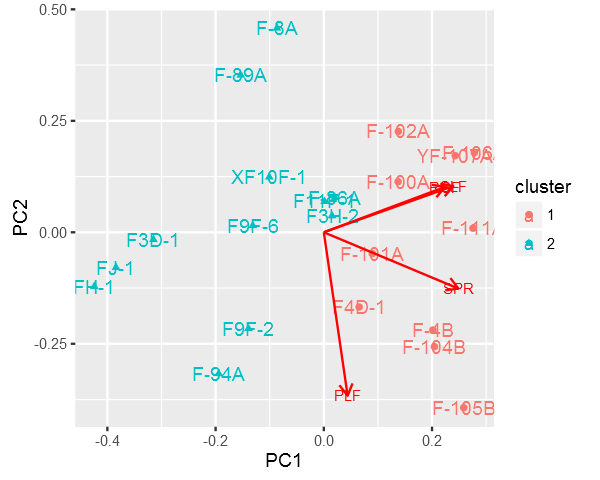

In [272]:
options(repr.plot.width=5,repr.plot.height=4)
autoplot(kmean_pca,data=kmean_df,colour='cluster',label=T,shape='cluster', loadings=T,loadings.label = T,loadings.label.size = 3)

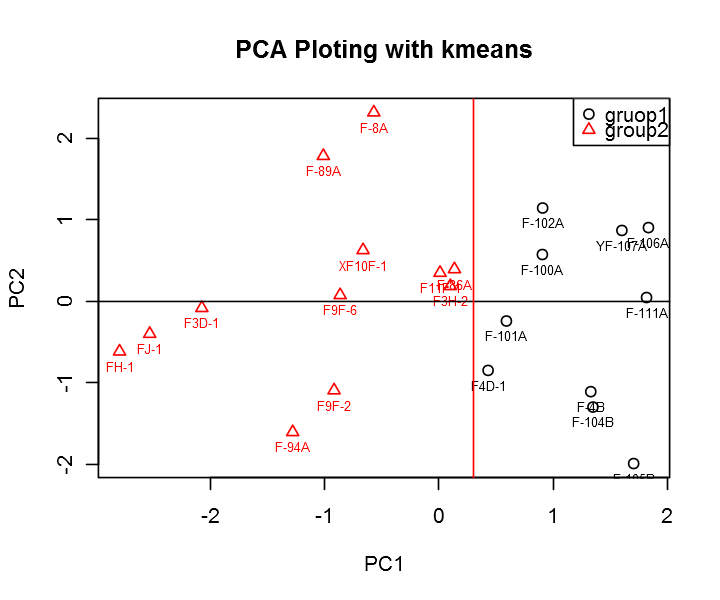

In [295]:
options(repr.plot.width=6,repr.plot.height=5)
plot(kmean_df[,-3], col=as.numeric(kmean_df$cluster), pch=as.numeric(kmean_df$cluster),main="PCA Ploting with kmeans")
legend("topright",c("gruop1","group2"), pch=c(1,2), col=c(1,2))
text(kmean_df$PC1,kmean_df$PC2,row.names(kmean_df),cex=0.6,col=as.numeric(kmean_df$cluster),pos=1)
abline(h=0,col="black")
abline(v=.3,col="red")

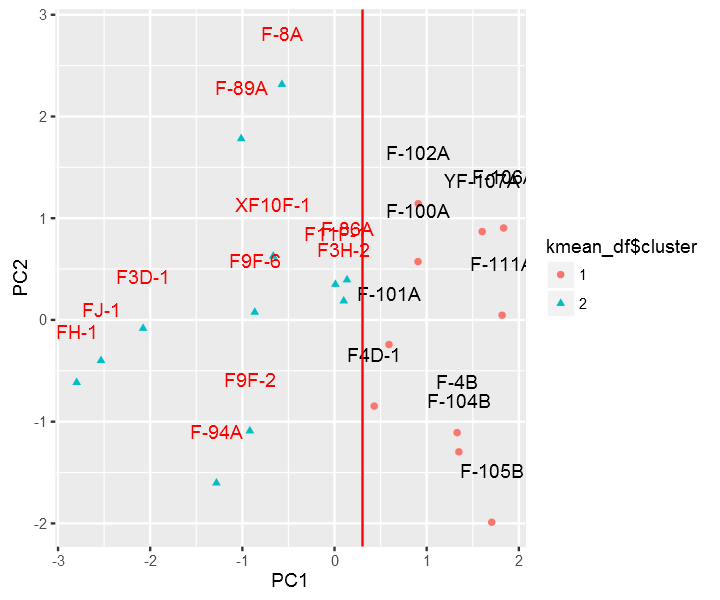

In [296]:
gg <- ggplot(kmean_df, aes(x=PC1,y=PC2,label = rownames(kmean_df))) + geom_point(aes(colour=kmean_df$cluster,shape=kmean_df$cluster)) 
gg + geom_text(nudge_y = 0.5, colour=kmean_df$cluster) + geom_vline(xintercept = .3, color='red')

## 3.    모형기반 군집화를 통해 최적의 군집 개수를 찾고 그 결과를 1번의 B, C와 같이 탐색하시오.

In [275]:
library(mclust)

 - 수치를 표준화 할지 안할지 결정
  - 표준편차나 통계치의 범위 변화가 크지 않아 표준화 하지 않고 진행.

In [276]:
jet_s <- jet[,-c(1,2,7)]
rownames(jet_s) <- jet[,1]

In [277]:
mc <- Mclust(jet_s)
mc

'Mclust' model object:
 best model: diagonal, varying volume and shape (VVI) with 3 components

In [278]:
summary(mc)

----------------------------------------------------
Gaussian finite mixture model fitted by EM algorithm 
----------------------------------------------------

Mclust VVI (diagonal, varying volume and shape) model with 3 components:

 log.likelihood  n df       BIC       ICL
      -43.76189 22 26 -167.8909 -168.7453

Clustering table:
 1  2  3 
 3  5 14 

 - 1번 $plot$을 통해 $BIC$가 가장 큰 3개의 $Cluster$형성이 좋다고 판단.

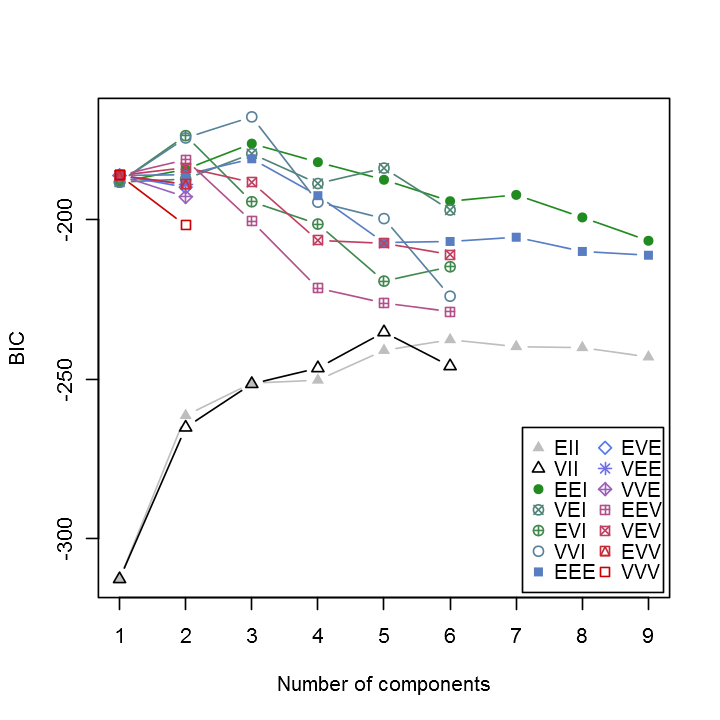

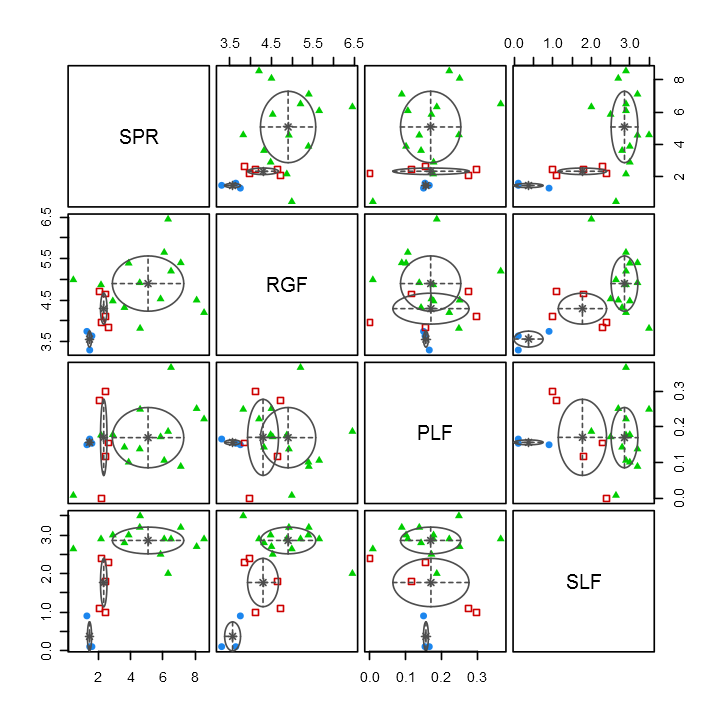

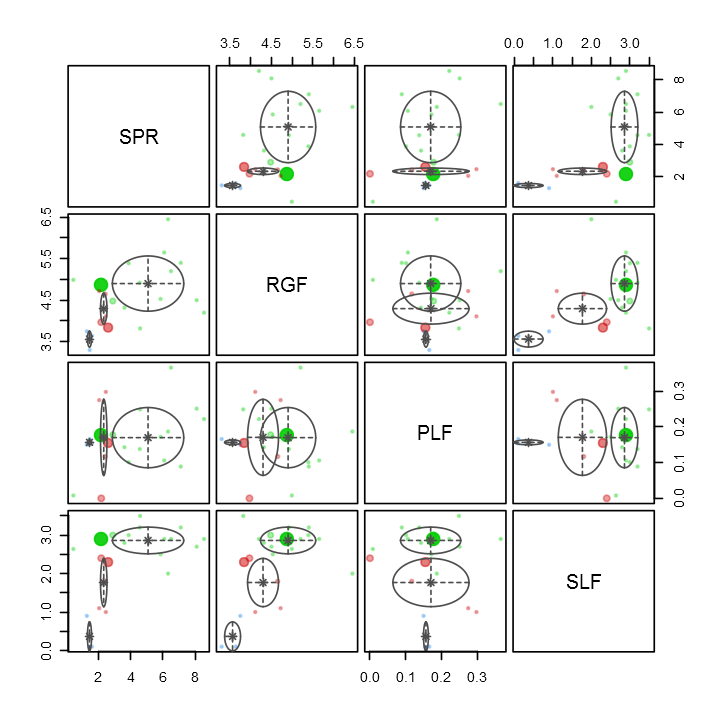

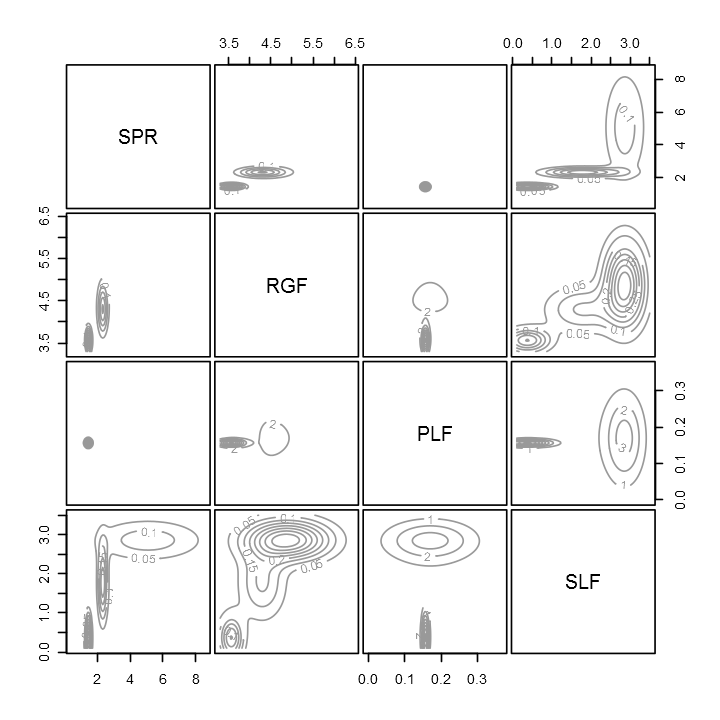

In [279]:
options(repr.plot.width=6, repr.plot.height=6)
plot(mc)

In [280]:
mc <- Mclust(jet_tmp,3) # 3개의 군집 선택.
mc$classification
jet_s$cluster <- as.factor(mc$classification)

[1] 1 1 3 2 2 1 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3

In [281]:
head(jet_s,3)

,SPR,RGF,PLF,SLF,cluster
FH-1,1.468,3.3,0.166,0.1,1
FJ-1,1.605,3.64,0.154,0.1,1
F-86A,2.168,4.87,0.177,2.9,3


## 3 - B. A의 결과를 사용해 두 개의 집단으로 관측치를 분류하고 각 집단의 특징을 원변수 관점에서 비교하시오.

 - 2개의 군집을 선택해야 하므로 MClust 재 진행.

In [282]:
mc <- Mclust(jet_tmp,2) # 2개의 군집 선택.
jet_s$cluster <- as.factor(mc$classification)

- $Describeby$함수를 활용하여 $Group$별 통계치 생성

In [283]:
tab <- describeBy(jet_s,group=jet_s$cluster,mat=T,digits=4)
tab

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
SPR1,1,1,1,8,2.013,0.4986,2.1185,2.013,0.6205,1.294,2.607,1.313,-0.2247,-1.8272,0.1763
SPR2,2,2,1,14,5.0481,2.3045,5.2215,5.1392,2.1831,0.455,8.548,8.093,-0.2862,-0.9654,0.6159
RGF1,3,1,2,8,3.9975,0.4872,3.905,3.9975,0.3484,3.3,4.72,1.42,0.2727,-1.4219,0.1723
RGF2,4,2,2,14,4.9086,0.6805,4.895,4.8708,0.6746,3.82,6.45,2.63,0.5157,-0.3598,0.1819
PLF1,5,1,3,8,0.1644,0.0924,0.1545,0.1644,0.0363,0,0.298,0.298,-0.1288,-0.9356,0.0327
PLF2,6,2,3,14,0.1705,0.0867,0.1745,0.1678,0.086,0.008,0.366,0.358,0.3427,-0.0537,0.0232
SLF1,7,1,4,8,1.2125,0.8919,1.05,1.2125,1.2602,0.1,2.4,2.3,0.0649,-1.7,0.3153
SLF2,8,2,4,14,2.8671,0.3544,2.9,2.8867,0.2224,2,3.5,1.5,-0.6198,0.4997,0.0947
cluster*1,9,1,5,8,1,0,1,1,0,1,1,0,NaN,NaN,0
cluster*2,10,2,5,14,2,0,2,2,0,2,2,0,NaN,NaN,0


 - $boxplot$을 활용 각 독립변수, $Group$별 데이터 비교.
 - $DescribeBy$와 $ggplot2$를 활용하여 데이터 비교.

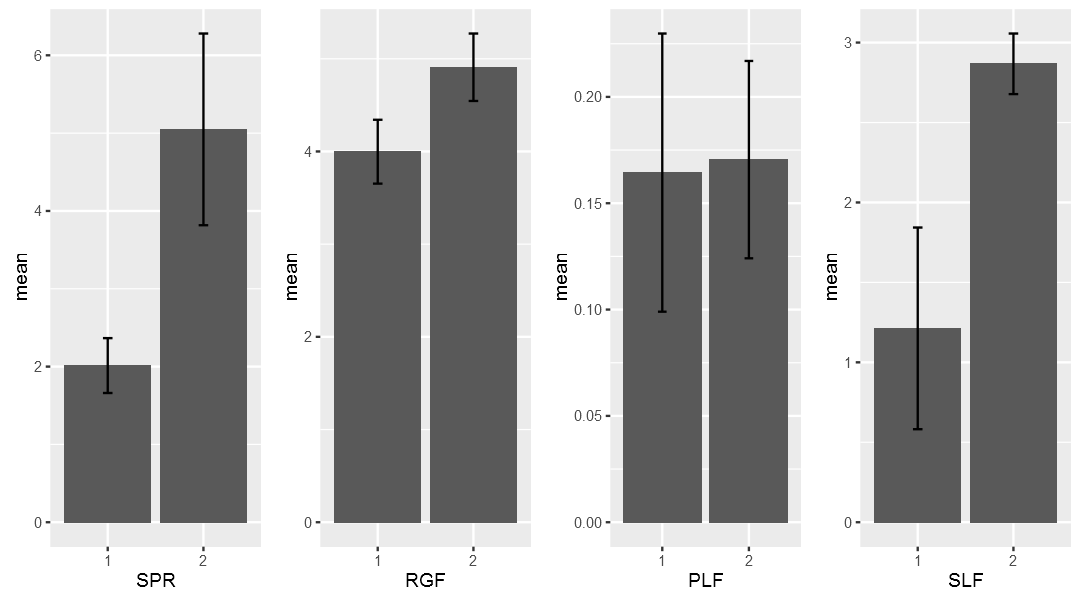

In [284]:
options(repr.plot.width=9,repr.plot.height=5)
gg1 <- ggplot(tab[c(1,2),],aes(x=group1,y=mean)) + geom_bar(position = position_dodge(), stat="identity") 
gg1 <- gg1 + geom_errorbar(aes(ymin=mean-2*se, ymax=mean+2*se, width=0.1)) + xlab("SPR") 
gg2 <- ggplot(tab[c(3,4),],aes(x=group1,y=mean)) + geom_bar(position = position_dodge(), stat="identity") 
gg2 <- gg2 + geom_errorbar(aes(ymin=mean-2*se, ymax=mean+2*se, width=0.1)) + xlab("RGF") 
gg3 <- ggplot(tab[c(5,6),],aes(x=group1,y=mean)) + geom_bar(position = position_dodge(), stat="identity") 
gg3 <- gg3 + geom_errorbar(aes(ymin=mean-2*se, ymax=mean+2*se, width=0.1)) + xlab("PLF") 
gg4 <- ggplot(tab[c(7,8),],aes(x=group1,y=mean)) + geom_bar(position = position_dodge(), stat="identity") 
gg4 <- gg4 + geom_errorbar(aes(ymin=mean-2*se, ymax=mean+2*se, width=0.1)) + xlab("SLF") 

grid.arrange(gg1, gg2,gg3,gg4,ncol=4)

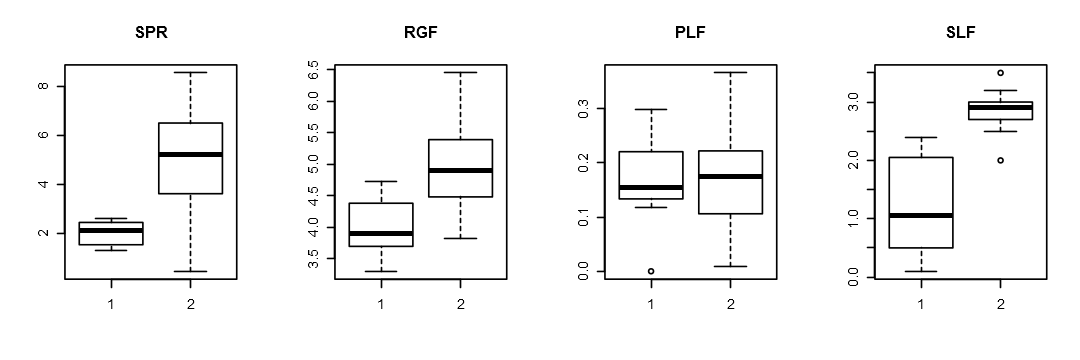

In [285]:
options(repr.plot.width=9,repr.plot.height=3)
par(mfrow=c(1,4))
for (i in 1:4){
     boxplot(jet_s[,i]~jet_s[,5],main=names(jet_s)[i])
}

 - $boxplot$을 통해 각 변수, $Group$별 데이터 비교.
 - $ggplot2$를 활용하여 각 통계치의 평균을 $barplot$과 $Standard \ Error$를 활용하여 비교.
 - 모든 독립변수의 평균에 대해 $Group1 < Group2$ 이다.
 - $SPR, SLF$의 경우 확연하게 $Group1, Group2$의 차이가 있다.
 - $PLF$와 $RGF$의 경우 크게 차이가 나지 않고 있다. 더욱 $PLF$의 경우 $SE$의 범위가 $Group1>Group2$이므로 유의하게 크다고 판단할 수 없다.
 - 하단의 $Boxplot$ $SPR,SLF$의 경우 두 그룹의 구분이 나지만 $RGF,PLF$의 경우 겹치는 부분과 분위 내 데이터가 포함되는 부분이 많다.

 - $Group$별 각 변수에 대한 $Boxplot$

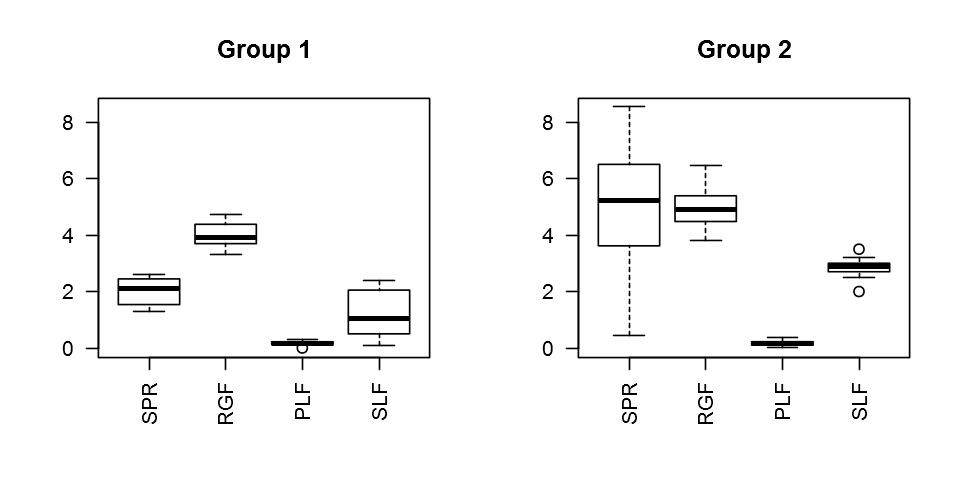

In [286]:
options(repr.plot.width=8,repr.plot.height=4)
par(mfrow=c(1,2))
for (i in 1:2){
  boxplot(jet_s[jet_s$cluster==i,-5],las=2,main=paste("Group",i), ylim=c(0,8.5))
}

 - $Pairs$ 그래프를 통해 각 $Cluster$의 분포를 확인. 
 - $PLF$의 분포를 보게 되면 전 범위에서 $Group1,Group2$가 관찰된다. 즉, 구분하는 요소가 되지 못한다. 
 - $RGF$의 경우 중간에 겹치는 부분이 5 보다 적은 구분에서 5이하의 값에서는 다소 보이므로 애매한 변수가 될 것으로 판단. <br> 5이상의 값에서는 $Group2$의 값만 존재하므로 5이상 부분에서는 좋은 선택이 될 것이다.
 - $SPR,SLF$의 경우가 확연하게 $Group$을 구분할 수 있다.

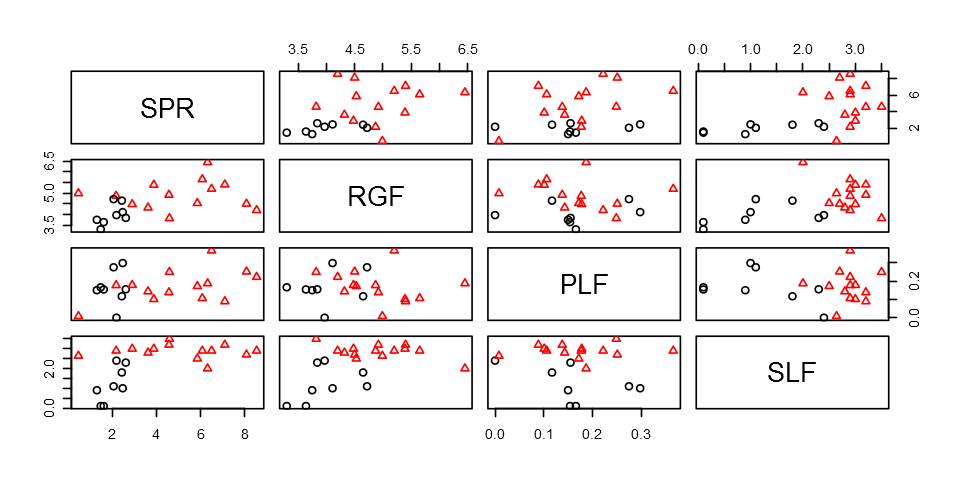

In [287]:
pairs(jet_s[,-5],col=as.numeric(jet_s$cluster),pch=as.numeric(jet_s$cluster))

### 3 - C. 두 집단을 주성분을 이용해 2차원 산점도를 표현. <br>즉, 제1 주성분과 제 2 주성분을 사용한 산점도에서 두 개의 집단을 서로 다른 마크와 색으로 표현하시오.

In [288]:
mc_pca <- prcomp(jet_s[,-5],scale = T) # scale을 하지 않은 데이터를 사용했으므로 scale수행.
mc_pca

Standard deviations:
[1] 1.4064330 1.0778969 0.7421941 0.5560867

Rotation:
          PC1        PC2        PC3        PC4
SPR 0.6011860 -0.3052264  0.1840062 -0.7152300
RGF 0.5408329  0.2456147 -0.7910625  0.1462644
PLF 0.1064118 -0.8853327 -0.1215182  0.4359998
SLF 0.5785773  0.2503921  0.5706094  0.5262670

In [289]:
summary(mc_pca) # 이전 PCA들과 마찬가지로 78% (데이터가 동일하므로)

Importance of components:
                          PC1    PC2    PC3     PC4
Standard deviation     1.4064 1.0779 0.7422 0.55609
Proportion of Variance 0.4945 0.2905 0.1377 0.07731
Cumulative Proportion  0.4945 0.7850 0.9227 1.00000

- $PCA$ 값 중 제 1 주성분, 제 2 주성분의 값과 $Cluster$ 값만 가지고 있는 $DataFrame$ 생성.

In [290]:
mc_df <- data.frame(PC1 = mc_pca$x[,1], PC2= mc_pca$x[,2], cluster=as.factor(jet_s$cluster))
rownames(mc_df) <- rownames(jet_s)
head(mc_df)

,PC1,PC2,cluster
FH-1,-2.7978623489877,-0.614521600283265,1
FJ-1,-2.53360097312598,-0.398682353891384,1
F-86A,0.135737051536855,0.393733577057406,2
F9F-2,-0.91861010674121,-1.09095027232653,1
F-94A,-1.28127814355926,-1.60311627130204,1
F3D-1,-2.07715408580006,-0.0821828168198559,1


 - $Biplot$을 통해 $PCA$의 영향도와 분포를 확인. 
 - $PC1$ : 힘이 좋고 멀리 가는 수치
  - $PC1$을 기준으로 힘이 좋고 멀리가며 무거운 전투기와 그렇지 못한 전투기로 구분된다.
 - $PC2$의 경우 뚜렷하게 구분되는 수치 범위는 없는것으로 보인다. 
  - 이유 주된 영향을 주는 변수가 $PLF$인데 $PLF$의 경우 구분에 영향도가 높지 않다.

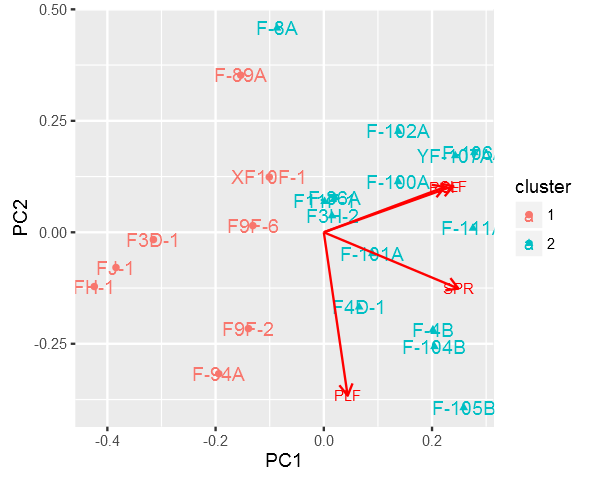

In [291]:
options(repr.plot.width=5,repr.plot.height=4)
autoplot(mc_pca,data=mc_df,colour='cluster',label=T,shape='cluster', loadings=T,loadings.label = T,loadings.label.size = 3)

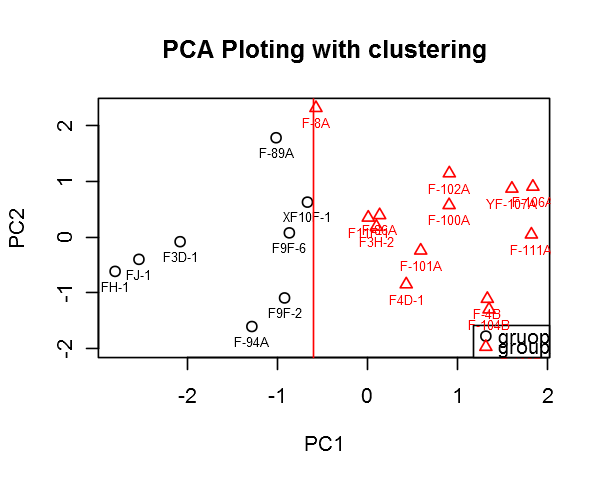

In [292]:
options(repr.plot.width=5,repr.plot.height=4)
plot(mc_df[,-3], col=as.numeric(mc_df$cluster), pch=as.numeric(mc_df$cluster),main="PCA Ploting with clustering")
legend("bottomright",c("gruop1","group2"), pch=c(1,2), col=c(1,2))
text(mc_df$PC1,mc_df$PC2,row.names(mc_df),cex=0.6,col=as.numeric(mc_df$cluster),pos=1)
abline(v=-0.6,col="red")

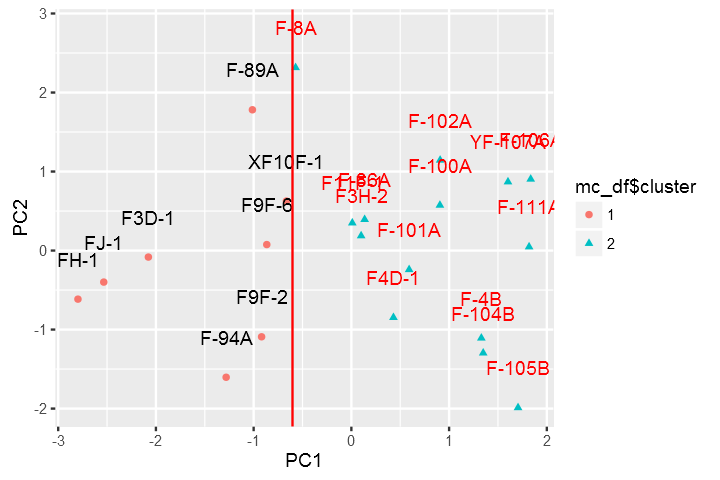

In [293]:
options(repr.plot.width=6,repr.plot.height=4)
gg <- ggplot(mc_df, aes(x=PC1,y=PC2,label = rownames(mc_df))) + geom_point(aes(colour=mc_df$cluster,shape=mc_df$cluster)) 
gg + geom_text(nudge_y = 0.5, colour=mc_df$cluster) + geom_vline(xintercept = -.6, color='red')